# Replication - Resource Figure

Here we provide a notebook to replicate the figure for the resource comparison


The notebook replicates the results in:
- /out/simulation/figures/resources.eps

The main script can be found at: 
- /scripts/simulation/figures/resoources.py

The original data/logs for the runs are found in:
- /out/resources/

In [5]:
# Modules
# =======================================================================================================================
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Plot Settings
# =======================================================================================================================

plt.rcParams['font.size'] = 7
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
cm = 1/2.54


In [7]:
# Data - #extracted from the logs (/scripts/simulation/figures/baseline_hazard.py)
# =======================================================================================================================
rsurvival_t = [2, 30, 241, 2309, 40444]
rsurvival_m = [250, 544, 1697, 6774, 21507]
#rsurvival_c = [91, 85, 83, 85]

rglmnet_t = [57, 71, 405, 793, 3904]
rglmnet_m = [333, 669, 2145, 8573, 28180]

probcox_t = [126, 158, 279, 374, 620]
probcox_m = [258, 318, 672, 2120, 7631]
#probcox_c = [88, 77, 76, 81]

probcox2_t = [477, 539, 636, 827, 1219]
probcox2_m = [247, 249, 253, 263, 272]

lifelines_t = [3, 19, 279, 2464, 24675]
lifelines_m = [213, 458, 1437, 5600, 23321]


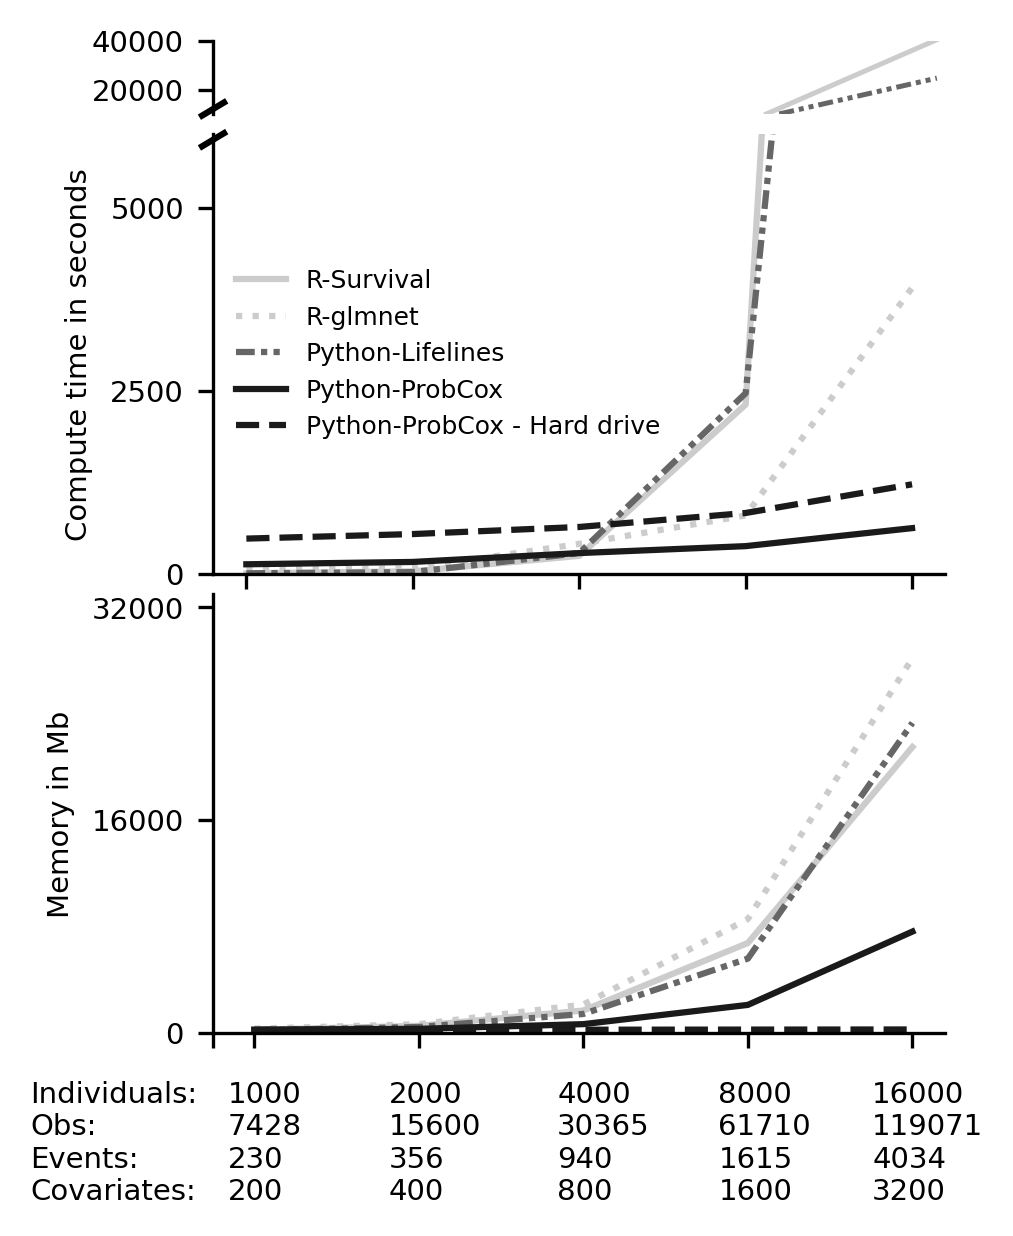

In [8]:

fig, ax = plt.subplots(4, 1, figsize=(8*cm, 13*cm), dpi=300, sharex=False, gridspec_kw={'height_ratios': [0.5, 3, 3, 1]})
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.075)
ax[3].set_yticklabels([])
ax[3].set_yticks([])
ax[3].set_xticks([])
ax[3].set_xticklabels([])
ax[2].set_xticklabels([])
ax[1].set_xticklabels([])
ax[3].spines['left'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].text(x=-.25, y=0 , s='Individuals:' "\n" 'Obs:' "\n" 'Events:' "\n" 'Covariates:')

ax[3].text(x=.02, y=0 , s='1000' "\n" '7428' "\n" '230' "\n" '200')
ax[3].text(x=.24, y=0 , s='2000' "\n" '15600' "\n" '356' "\n" '400')
ax[3].text(x=.47, y=0 , s='4000' "\n" '30365' "\n" '940' "\n" '800')
ax[3].text(x=.69, y=0 , s='8000' "\n" '61710' "\n" '1615' "\n" '1600')
ax[3].text(x=.9, y=0 , s='16000' "\n" '119071' "\n" '4034' "\n" '3200')

ax[1].set_ylabel('Compute time in seconds')
ax[2].set_ylabel('Memory in Mb')

ax[1].plot([0.2, 0.4, 0.6, 0.8, 1], rsurvival_t, label=r'R-Survival', color='.80')
ax[1].plot([0.2, 0.4, 0.6, 0.8, 1], rglmnet_t, label=r'R-glmnet', color='.80', ls=':')
ax[1].plot([0.2, 0.4, 0.6, 0.8, 1], lifelines_t, label=r'Python-Lifelines', color='.4', ls=(0, (3, 1, 1, 1, 1, 1)))
ax[1].plot([0.2, 0.4, 0.6, 0.8, 1], probcox_t, label=r'Python-ProbCox', color='.1')
ax[1].plot([0.2, 0.4, 0.6, 0.8, 1], probcox2_t, label=r'Python-ProbCox - Hard drive', color='.1', ls='--')

ax[2].plot([0.2, 0.4, 0.6, 0.8, 1], rsurvival_m, color='.8')
ax[2].plot([0.2, 0.4, 0.6, 0.8, 1], rglmnet_m, color='.8', ls=':')
ax[2].plot([0.2, 0.4, 0.6, 0.8, 1], lifelines_m, color='.4', ls=(0, (3, 1, 1, 1, 1, 1)))
ax[2].plot([0.2, 0.4, 0.6, 0.8, 1], probcox_m, color='.1')
ax[2].plot([0.2, 0.4, 0.6, 0.8, 1], probcox2_m, color='.1', ls='--')


ax[1].legend(frameon=False, loc='center left', prop={'size': 6})


ax[1].set_xticks([0.15, 0.2, 0.4, 0.6, 0.8, 1])
ax[2].set_xticks([0.15, 0.2, 0.4, 0.6, 0.8, 1])

ax[0].plot([0.8, 1], [10000, rsurvival_t[-1]], color='.8', linewidth=1.2)
ax[0].plot([0.815, 1], [10000, lifelines_t[-1]], color='.4', linewidth=1.2, ls=(0, (3, 1, 1, 1, 1, 1)))

ax[0].set_xticks([0.15, 0.2, 0.4, 0.6, 0.8, 1])
ax[0].xaxis.set_ticks_position('none')

ax[0].spines['bottom'].set_visible(False)
ax[0].set_xticklabels([])
ax[0].set_ylim([10000, 40000])
ax[0].set_yticks([20000, 40000])

ax[1].set_ylim([0, 6000])
ax[1].set_yticks([0, 2500, 5000])
ax[1].set_yticks([0, 2500, 5000])

ax[2].set_ylim([0, 33000])
ax[2].set_yticks([0, 16000, 32000])
#ax[2].set_yticklabels(['0', '16', '32'])

d = .015
kwargs = dict(transform=ax[1].transAxes, color='k', clip_on=False)
kwargs.update(transform=ax[1].transAxes)  # switch to the bottom axes
ax[1].plot((-d, +d), (0.988 - d, 0.988 + d), **kwargs)  # bottom-left diagonal

ax[1].plot((-d, +d), (1.058 - d, 1.058 + d), **kwargs)  # bottom-left diagonal


plt.show()
plt.close()